In [13]:
import numpy as np
import cmath
import scipy
import random
from scipy.linalg import hadamard
from numpy.linalg import eig, qr, svd,inv
import matplotlib.pyplot as plt

In [14]:
#Pauli Matrices

s0 = [[1,0,0],[0,1,0],[0,0,1]];
s1 = [[0,1,0],[1,0,1],[0,1,0]]/np.sqrt(2);
s2 = [[0,-1j,0],[1j,0,-1j],[0,1j,0]]/np.sqrt(2);
s3 = [[1.0,0,0],[0,0,0],[0,0,-1.0]];

In [15]:
# useful for tensor products definition later on.
m = [s0 for i in range(2)];

In [16]:
# Will be useful for longer chains, to define hamiltonian
def func(n):
    if(n == 1):
        return(m[n-1])
 
    return np.kron(m[n-1],func(n-1))



In [17]:
#Getting four lowest eigen states

def get_four_lowest_eigenvectors(matrix):
    eigenvalues, eigenvectors = np.linalg.eig(matrix)
    indices = np.argsort(eigenvalues)[0:4]  # Indices of the four lowest eigenvalues
    four_eigenvectors = eigenvectors[:, indices]
    return four_eigenvectors

In [18]:
#S+,S- operators
sp = s1+1j*s2
sm = s1 -1j*s2

In [19]:
#perturbed hamiltonian definition as a function of perturbation t

def hp(t):
    
    n=2;

 
  
    H = np.zeros((3**n,3**n));

    
        
    T = H;
    m[0] = s3;
    m[1] =s3;
        
    
    T = T + func(n);
        
    
    m[0] = 0.5*np.exp(1j*t)*sp;            # perturbation
    m[1] =sm;
    
    T = T + func(n);
        
    m[0] = 0.5*np.exp(-1j*t)*sm;          # perturbation
    m[1] =sp;
       
    T = T + func(n);
         
        
        
        
    m[0] = s0;
    m[1] =s0;
        
        
        
        
    H = H + (T-H) + (0.99)*np.dot(T-H,T-H)/3;  # The coefficient has to be slightly off 1.0 to break degeneracy. Berry phase becomes complicated for degenerate systems
        
    T = H;
    m[1] = s3;
    m[0] =s3;
        
    
    T = T + func(n);
          
    
    m[1] = 0.5*np.exp(0)*sp;
    m[0] =sm;
    
    T = T + func(n);
        
    m[1] = 0.5*np.exp(0)*sm;
    m[0] =sp;
       
    T = T + func(n);
        
    m[1] =s0;
    m[0] =s0;
        
    H = H + (T-H) + (0.99)*np.dot(T-H,T-H)/3;
       

        
    return H

    
    
    

In [20]:
w = get_four_lowest_eigenvectors(hp(np.pi))[:,0]

w
#getting ground state

array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
       -7.07106781e-01-8.65956056e-17j,  0.00000000e+00+0.00000000e+00j,
       -5.94731992e-17+8.79076603e-17j,  0.00000000e+00+0.00000000e+00j,
        7.07106781e-01+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j])

In [21]:
#Gate definitions obtained from experiments

I = 1j
i  = [[1, 0, 0], [0, 1, 0], [0, 0, 1]];
# x01_1 = [[0, 1, 0], [1, 0, 0], [0, 0, np.exp(1j*phi2_1)]] ;
# x01_2 = [[0, 1, 0], [1, 0, 0], [0, 0, np.exp(1j*phi2_2)]] ;

# x12_1 = [[np.exp(1j*phi0_1), 0, 0], [0, 0, 1], [0, 1, 0]] ;
# x12_2 = [[np.exp(1j*phi0_2), 0, 0], [0, 0, 1], [0, 1, 0]] ;

x01_1 = [[0, -1j, 0], [-1j, 0, 0], [0, 0, 1]] ;
x01_2 = [[0, -1j, 0], [-1j, 0, 0], [0, 0, 1]] ;

x12_1 = [[1, 0, 0], [0, 0, -1j], [0, -1j, 0]] ;
x12_2 = [[1, 0, 0], [0, 0, -1j], [0, -1j, 0]] ;

def u(t,p,l):
    return np.array([[np.cos(t/2),-np.exp(1j*l)*np.sin(t/2),0],[np.exp(1j*p)*np.sin(t/2),np.exp(1j*(p+l))*np.cos(t/2),0],[0,0,1]])

sx01_1 = [[1/np.sqrt(2), -1j/np.sqrt(2), 0], [-1j/np.sqrt(2),1/np.sqrt(2), 
    0], [0, 0, 1]] ;
sx12_1 = [[1, 0, 0], [0, 1/np.sqrt(2), -1j/np.sqrt(2)], [0, -1j/np.sqrt(2), 
    1/np.sqrt(2)]] ;

sx01_2 = [[1/np.sqrt(2), -1j/np.sqrt(2), 0], [-1j/np.sqrt(2),1/np.sqrt(2), 
    0], [0, 0, 1]] ;
sx12_2 = [[1, 0, 0], [0, 1/np.sqrt(2), -1j/np.sqrt(2)], [0, -1j/np.sqrt(2), 
    1/np.sqrt(2)]] ;

p0 = [[1, 0, 0], [0, 0, 0], [0, 0, 0]];
p1 = [[0, 0, 0], [0, 1, 0], [0, 0, 0]];
p2 = [[0, 0, 0], [0, 0, 0], [0, 0, 1]];
cxq01 = np.kron(p0, i) + np.kron(p1, [[0, 1, 0], [1, 0, 0], [0, 0, 1j]]) + np.kron(p2, [[1,0,0],[0,1,0],[0,0,np.exp(1j)]]);

In [22]:
#Gate definitions

def rz12(x):
    return [[1,0,0],[0,np.exp(0),0],[0,0,np.exp(I*x)]]

def rz01(x):
    return [[np.exp(0),0,0],[0,np.exp(I*x),0],[0,0,1]]

In [23]:
# For perturbation 0

hg = hp(0)

In [24]:
#Cost function such that the solution is the ground state

def G1(x):
    a = x[0]
    b =x[1]
    c =x[2]
    d =x[3]
    e=x[4]
    f=x[5]
    g =x[6]
    h = x[7]
    
    
    



    GS = np.kron(u(a,0,c),i)
    

    GS =GS@cxq01
    
    
    GS =GS@np.kron(x12_1,i)
    GS =GS@np.kron(i,x12_2)

    GS =GS@np.kron(sx01_1,i)
    GS =GS@np.kron(rz01(e),i)
    GS =GS@np.kron(sx01_1,i)
    GS =GS@np.kron(rz01(f),i)


    GS =GS@cxq01
   
    GS = GS@np.kron(x01_1,i)
    GS = GS@np.kron(x12_1,i)
    GS = GS@np.kron(x01_1,i)

    
    
    w = [1,0,0,0,0,0,0,0,0]
    
    w = w@GS
    
    
    return np.linalg.norm(hg@w - np.sort(eig(hg)[0])[0]*w)



In [25]:
#State vector coming from the circuit

def g1(x):
    
    
    
    

    a = x[0]
    b =x[1]
    c =x[2]
    d =x[3]
    e=x[4]
    f=x[5]
    g =x[6]
    h = x[7]
    
    
    


    GS = np.kron(u(a,0,c),i)
    

    GS =GS@cxq01
    
    
    GS =GS@np.kron(x12_1,i)
    GS =GS@np.kron(i,x12_2)

    GS =GS@np.kron(sx01_1,i)
    GS =GS@np.kron(rz01(e),i)
    GS =GS@np.kron(sx01_1,i)
    GS =GS@np.kron(rz01(f),i)

    GS =GS@cxq01
   
    GS = GS@np.kron(x01_1,i)
    GS = GS@np.kron(x12_1,i)
    GS = GS@np.kron(x01_1,i)

    
    
    w = [1,0,0,0,0,0,0,0,0]
    
    w = w@GS
    
    
    return w

In [26]:
hg = hp(0)

In [27]:
# example: optimising hg =h(0) hamiltonian
 
#  Cost function = Eigenvector equation with eigenvalue -2/3

hg=hp(0)

import numpy as np
from scipy.optimize import minimize
result = minimize(G1,[0,0,0,0,0,0,0,0],  method='CG')


result.x,result.fun,np.abs(g1(result.x))**2

(array([ 5.05222826e+00,  0.00000000e+00, -3.35593980e+00,  0.00000000e+00,
        -7.85398332e+00,  1.27772365e-04,  0.00000000e+00,  0.00000000e+00]),
 2.0866525521465995e-06,
 array([0.        , 0.        , 0.33333222, 0.        , 0.33333333,
        0.        , 0.33333445, 0.        , 0.        ]))

In [28]:
# example: optimising hg =h(0) hamiltonian
#  Does cost function need to be changed?    
#  Cost function = Eigenvector equation with eigenvalue -2/3

hg=hp(4*np.pi/7)

import numpy as np
from scipy.optimize import minimize
result = minimize(G1,[0,0,0,0,0,0,0,0],  method='CG')


result.x,result.fun,np.abs(g1(result.x))**2

(array([ 1.40627194,  0.        , -2.23596483,  0.        , -2.02313073,
        -0.89759791,  0.        ,  0.        ]),
 1.493881833644228e-08,
 array([0.        , 0.        , 0.41810842, 0.        , 0.16378317,
        0.        , 0.4181084 , 0.        , 0.        ]))

In [29]:
# example: optimising hg =h(0) hamiltonian
#  Does cost function need to be changed?    
#  Cost function = Eigenvector equation with eigenvalue -2/3

hg=hp(np.pi/2)

import numpy as np
from scipy.optimize import minimize
result = minimize(G1,[0,0,0,0,0,0,0,0],  method='CG')


result.x,result.fun,np.abs(g1(result.x))**2

(array([ 1.36846073,  0.        , -1.95390752,  0.        , -1.90781497,
        -0.78539817,  0.        ,  0.        ]),
 2.5831463595576937e-08,
 array([0.        , 0.        , 0.39952109, 0.        , 0.2009578 ,
        0.        , 0.39952112, 0.        , 0.        ]))

In [30]:
hg=hp(2*np.pi/3)

import numpy as np
from scipy.optimize import minimize
result = minimize(G1,[0,0,0,0,0,0,0,0],  method='BFGS')


result.x,result.fun,np.abs(g1(result.x))**2


(array([ 4.82472468,  0.        ,  0.51284202,  0.        , -2.21030367,
        -1.04719757,  0.        ,  0.        ]),
 1.5136538389879565e-08,
 array([0.        , 0.        , 0.44395021, 0.        , 0.11209958,
        0.        , 0.44395021, 0.        , 0.        ]))

In [31]:
hg=hp(2*np.pi/5)

import numpy as np
from scipy.optimize import minimize
result = minimize(G1,[0,0,0,0,0,0,0,0],  method='BFGS')


result.x,result.fun,np.abs(g1(result.x))**2


(array([ 1.32091634,  0.        , -1.57547149,  0.        , -1.77926162,
        -0.62831853,  0.        ,  0.        ]),
 4.2734412416791234e-08,
 array([0.        , 0.        , 0.37635616, 0.        , 0.24728767,
        0.        , 0.37635617, 0.        , 0.        ]))

In [32]:
hg=hp(2*np.pi/6)

import numpy as np
from scipy.optimize import minimize
result = minimize(G1,[0,0,0,0,0,0,0,0],  method='BFGS')


result.x,result.fun,np.abs(g1(result.x))**2


(array([ 1.29400965,  0.        , -1.33280211,  0.        , -1.71280047,
        -0.52359911,  0.        ,  0.        ]),
 1.0852470017909032e-07,
 array([0.        , 0.        , 0.36336698, 0.        , 0.27326601,
        0.        , 0.36336701, 0.        , 0.        ]))

In [33]:
hg=hp(2*np.pi/7)

import numpy as np
from scipy.optimize import minimize
result = minimize(G1,[0,0,0,0,0,0,0,0],  method='BFGS')


result.x,result.fun,np.abs(g1(result.x))**2


(array([ 1.27750049,  0.        , -1.16375118,  0.        , -1.67389836,
        -0.44879916,  0.        ,  0.        ]),
 1.2568889545976345e-07,
 array([0.        , 0.        , 0.35544556, 0.        , 0.28910862,
        0.        , 0.35544582, 0.        , 0.        ]))

In [34]:
# example: optimising hg =h(0) hamiltonian
#  Does cost function need to be changed?    
#  Cost function = Eigenvector equation with eigenvalue -2/3

hg=hp(3*np.pi/2)

import numpy as np
from scipy.optimize import minimize
result = minimize(G1,[0,0,0,0,0,0,0,0],  method='CG')


result.x,result.fun,np.abs(g1(result.x))**2

(array([ 1.36846078,  0.        ,  1.18768511,  0.        , -8.19100026,
         0.78539812,  0.        ,  0.        ]),
 2.493740468599583e-08,
 array([0.        , 0.        , 0.39952111, 0.        , 0.20095779,
        0.        , 0.3995211 , 0.        , 0.        ]))

In [35]:
hg=hp(4*np.pi/3)

import numpy as np
from scipy.optimize import minimize
result = minimize(G1,[0,0,0,0,0,0,0,0],  method='BFGS')


result.x,result.fun,np.abs(g1(result.x))**2


(array([ 1.45846064,  0.        ,  1.56003955,  0.        , -2.21030365,
         1.04719752,  0.        ,  0.        ]),
 2.570962049387012e-08,
 array([0.        , 0.        , 0.44395022, 0.        , 0.11209958,
        0.        , 0.4439502 , 0.        , 0.        ]))

In [36]:
hg=hp(4*np.pi/5)

import numpy as np
from scipy.optimize import minimize
result = minimize(G1,[0,0,0,0,0,0,0,0],  method='BFGS')


result.x,result.fun,np.abs(g1(result.x))**2


(array([ 4.7585407 ,  0.        , -0.07014538,  0.        , -2.53852046,
        -1.25663707,  0.        ,  0.        ]),
 9.231643769047608e-09,
 array([0.        , 0.        , 0.47693233, 0.        , 0.04613534,
        0.        , 0.47693233, 0.        , 0.        ]))

In [37]:
hg=hp(6*np.pi/5)

import numpy as np
from scipy.optimize import minimize
result = minimize(G1,[0,0,0,0,0,0,0,0],  method='BFGS')


result.x,result.fun,np.abs(g1(result.x))**2


(array([-1.52464461,  0.        , -1.92985465,  0.        , -3.74466487,
        -1.88495561,  0.        ,  0.        ]),
 1.5473231179612893e-08,
 array([0.        , 0.        , 0.47693233, 0.        , 0.04613535,
        0.        , 0.47693232, 0.        , 0.        ]))

In [38]:
hg=hp(4*np.pi/7)

import numpy as np
from scipy.optimize import minimize
result = minimize(G1,[0,0,0,0,0,0,0,0],  method='BFGS')


result.x,result.fun,np.abs(g1(result.x))**2


(array([ 1.40627187,  0.        , -2.23596492,  0.        , -2.02313077,
        -0.89759794,  0.        ,  0.        ]),
 3.502231385058304e-08,
 array([0.        , 0.        , 0.41810839, 0.        , 0.16378317,
        0.        , 0.41810844, 0.        , 0.        ]))

In [39]:
hg=hp(6*np.pi/7)

import numpy as np
from scipy.optimize import minimize
result = minimize(G1,[0,0,0,0,0,0,0,0],  method='BFGS')


result.x,result.fun,np.abs(g1(result.x))**2


(array([20.39586053,  0.        ,  2.36996094,  0.        , -3.58245397,
         1.79519579,  0.        ,  0.        ]),
 1.1423738759105725e-08,
 array([0.        , 0.        , 0.48775536, 0.        , 0.02448927,
        0.        , 0.48775536, 0.        , 0.        ]))

In [40]:
hg=hp(10*np.pi/6)

import numpy as np
from scipy.optimize import minimize
result = minimize(G1,[0,0,0,0,0,0,0,0],  method='BFGS')


result.x,result.fun,np.abs(g1(result.x))**2


(array([ 1.29400921,  0.        ,  0.76159287,  0.        , -1.71280072,
         0.52359845,  0.        ,  0.        ]),
 1.311598488094558e-07,
 array([0.        , 0.        , 0.36336677, 0.        , 0.27326603,
        0.        , 0.36336721, 0.        , 0.        ]))

In [41]:
hg=hp(8*np.pi/7)

import numpy as np
from scipy.optimize import minimize
result = minimize(G1,[0,0,0,0,0,0,0,0],  method='BFGS')


result.x,result.fun,np.abs(g1(result.x))**2


(array([-4.73688071,  0.        ,  1.91322434,  0.        , -2.70073136,
         1.34639684,  0.        ,  0.        ]),
 1.047611198650322e-08,
 array([0.        , 0.        , 0.48775536, 0.        , 0.02448927,
        0.        , 0.48775537, 0.        , 0.        ]))

In [42]:
hg=hp(10*np.pi/7)

import numpy as np
from scipy.optimize import minimize
result = minimize(G1,[0,0,0,0,0,0,0,0],  method='BFGS')


result.x,result.fun,np.abs(g1(result.x))**2


(array([ 1.40627189,  0.        ,  1.35442674,  0.        , -2.02313076,
         0.89759789,  0.        ,  0.        ]),
 1.8801629701220288e-08,
 array([0.        , 0.        , 0.41810839, 0.        , 0.16378317,
        0.        , 0.41810843, 0.        , 0.        ]))

In [43]:
hg=hp(12*np.pi/7)

import numpy as np
from scipy.optimize import minimize
result = minimize(G1,[0,0,0,0,0,0,0,0],  method='BFGS')


result.x,result.fun,np.abs(g1(result.x))**2


(array([1.27750021, 0.        , 0.63144367, 0.        , 4.60928666,
        0.44879832, 0.        , 0.        ]),
 1.6776386995309957e-07,
 array([0.        , 0.        , 0.35544542, 0.        , 0.28910859,
        0.        , 0.35544599, 0.        , 0.        ]))

In [ ]:
# Berry phase estimation using exact ground states and Ansatz states

In [44]:

#t runs from 0 to 2*pi with N divisons
m = [s0 for i in range(2)];
# B = np.eye(4)  # Berry phase from ED 
B_a = 0
B_a_l = []
B_e = 0
B_e_l = []
N = 40 #number of divisions
t = np.linspace(0,2*np.pi,N);#perturbation angles

t[-1] =0.0;#final perturbation = initial perturbation

hg = hp(0) #initial unperturbed hamiltonian 

G=np.random.random(9) # G for gauge fixing

#Calculating berry phase
for j in range(len(t)-1):
       
       #hamiltonian of the intermediate time step j
       hg = hp(t[j])
       
       #obtaining groundstates 
       l1 = get_four_lowest_eigenvectors(hg)[:,0]
       
       l2 = g1(minimize(G1,[0,0,0,0,0,0,0,0],  method='BFGS').x)
       print(G1(minimize(G1,[0,0,0,0,0,0,0,0],  method='BFGS').x))
       
       l2 = np.vdot(l2,G)*l2 
       l1 = np.vdot(l1,G)*l1 
       #hamiltonian for the t[j+1] th step 
    
        
       hg = hp(t[j+1])
        
       r2 = g1(minimize(G1,[0,0,0,0,0,0,0,0],  method='BFGS').x)
       r1 = get_four_lowest_eigenvectors(hg)[:,0]
       
        
       r2 = np.vdot(r2,G)*r2
       r1 = np.vdot(r1,G)*r1 
       
       
       r2 = r2
    
       B_a = B_a + cmath.phase(np.vdot(l2,r2)/np.linalg.norm(l2))        # Berry phase increment terms
       B_e = B_e + cmath.phase(np.vdot(l1,r1)/np.linalg.norm(l1))
       B_a_l.append(B_a)
       B_e_l.append(B_e)
       
       print(B_a,B_e)
 
B_a = ((B_a/np.pi))%2
B_e = ((B_e/np.pi))%2
#Printing berry phase    
print(B_a,B_e)   

3.753334944223374e-07
0.036009756996791556 0.03601270115188251
5.136490453627009e-07
0.07240554661951548 0.07240464574049757
1.5446577985095619e-07
0.10957203566432344 0.10956900472716627
2.8512749872230644e-07
0.14792967077926353 0.14792768117170935
1.489489108478659e-07
0.1879494718887912 0.1879479244732096
2.2388388455213374e-07
0.23016331505091264 0.23016179001441844
1.301294961077542e-07
0.2751911635881866 0.2751896055218668
9.247879793950172e-08
0.32377016125902336 0.3237686874901863
1.9951316627029562e-08
0.3767899766961369 0.37678842977157656
7.246770871401977e-08
0.4353337080849973 0.43533219764811976
2.989030226355325e-08
0.5007259282067043 0.5007244162115381
2.2455013229835428e-08
0.5745777385496458 0.5745762355650779
2.3719249521806066e-08
0.6588137291716514 0.6588122007588847
1.5136538389879565e-08
0.7556403513444201 0.7556388214670713
9.633101557539605e-09
0.8673812610213399 0.8673797349131337
1.2909896675065727e-08
0.996060105578167 0.9960585872438203
6.5288624544986334e

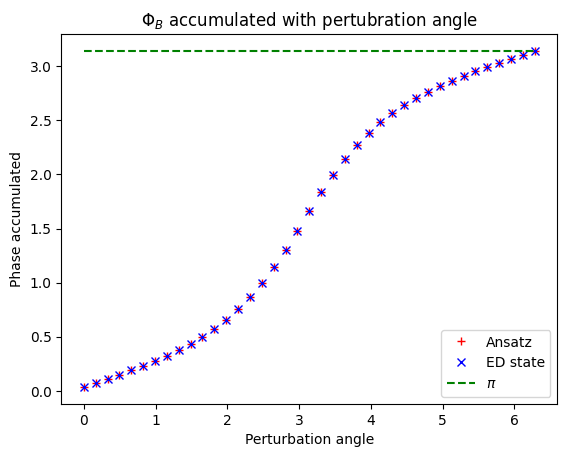

In [46]:
#Berry phase convergence plot n=40

plt.plot(np.linspace(0,2*np.pi,39),B_a_l,"+r",label="Ansatz")
plt.plot(np.linspace(0,2*np.pi,39),B_e_l,"xb",label="ED state")
plt.plot(np.linspace(0,2*np.pi,39),np.ones(39)*np.pi,"--g",label ="$\pi$")

plt.xlabel("Perturbation angle")
plt.ylabel("Phase accumulated")
plt.title("$\Phi_B$ accumulated with pertubration angle")
plt.legend()
plt.savefig("BP_accumulation_n40.pdf")